In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
linear_data = [(i, 2*i + 200) for i in range(100,400)]
data = pd.DataFrame(linear_data, columns=['x', 'y'])

In [5]:
print data.head()

     x    y
0  100  400
1  101  402
2  102  404
3  103  406
4  104  408


In [6]:
## Split population and profit into X and y
X_df = pd.DataFrame(data.x)
y_df = pd.DataFrame(data.y)
y_df['y'] = y_df['y']

## Length, or number of observations, in our data
m = len(y_df)

In [7]:
y_df

,y
0,400
1,402
2,404
3,406
4,408
5,410
6,412
7,414
8,416
9,418


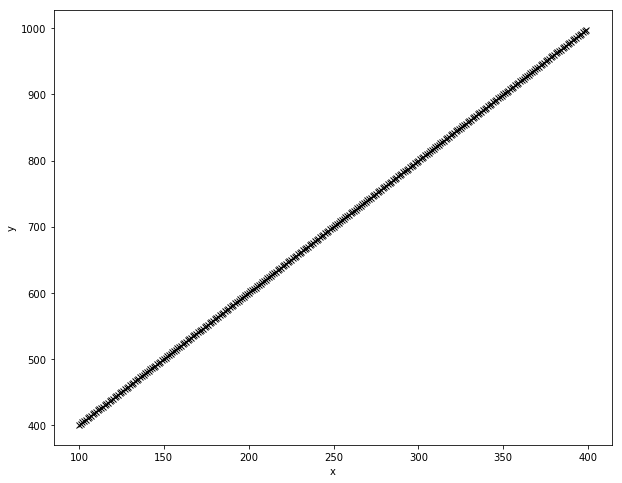

In [8]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'kx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [117]:
## Add a columns of 1s as intercept to X
X_df['intercept'] = 100 # to give more weight to intecept. We can also just scale down X 

## Transform to Numpy arrays for easier matrix math and start theta at 0
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([-100,200])

In [118]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [119]:
cost_function(X, y, theta)

54970167

In [217]:
def gradient_descent(X, y, theta, iterations, nu = .15):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with self-annealinglearning rate following Adadelta approach
    
    update = -nu / sqrt(E[grad**2] + epsilon) * gradient
    where E[grad**2] = gamma * E[g**2]_t-1 + (1-gamma)*g**2_t
    """
    ones = np.ones((1, theta.shape[0]))

    epsilon = .000000000000001
    gamma = .3
    
    previous_gradient = np.zeros((1, theta.shape[0]))
    grad_0_history = [(0,0)] * iterations
    cost_history = [(0,0)] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        # print "loss: {0}\ntheta: {1}".format(loss, theta)
        gradient = X.T.dot(loss)/m 
        # print "{0} gradient: {1}".format(iteration, gradient)
        
        EG = gamma * (previous_gradient**2) + (1 - gamma) * (gradient**2)
        divisor = np.sqrt(EG + epsilon)
        
        # choose to divide gradient by the divisor instead of nu by divisor for stability
        ratio = np.divide(gradient, divisor).flatten()
        # print "\ratio: {0}".format(ratio)
        
        # print "\tnu_alpha {0}".format(nu_alpha)
        update = nu * ratio
        # print "update: {0}".format(update)
        theta = theta - update
        cost = cost_function(X, y, theta)
        # print "cost: {0}".format(cost)
        cost_history[iteration] = (iteration, cost)
        previous_gradient = gradient 
        grad_0_history[iteration] = (iteration, gradient[0])
    return theta, cost_history, grad_0_history

In [220]:
iterations = 4000
alpha = 0.15
(t, c, g) = gradient_descent(X,y,theta,iterations,alpha)

In [221]:
print t

[ 1.925  1.925]


In [222]:
b = np.zeros((4, 4))
b
b = np.delete(b, 0, axis=0)
b = np.vstack([b, [1,1,1,1]])
ones = np.ones((1,b.shape[0]))
b.T.dot(ones.T).flatten()

array([ 1.,  1.,  1.,  1.])

In [223]:
## Prediction
print np.array([3.5, 1]).dot(t)
print np.array([7, 1]).dot(t)

8.6625
15.4


In [224]:
## Plotting the best fit line
best_fit_x = np.linspace(0, 500, 20)
best_fit_y = [t[1]*100 + t[0]*xx for xx in best_fit_x]

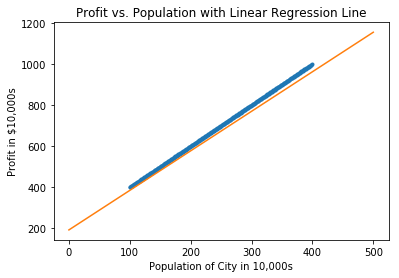

In [225]:
plt.figure()
plt.plot(X_df.x, y_df, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line')
plt.show()

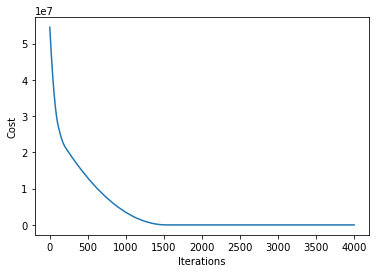

364.64109374999958

In [226]:
plt.figure()
[iterations, cost] = zip(*c)
plt.plot(iterations, cost, '-')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
cost[-1]

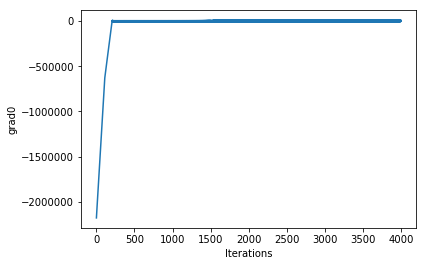

7102.5125000000216

In [227]:
plt.figure()
[iterations, grad0] = zip(*g)
plt.plot(iterations, grad0, '-')
plt.xlabel("Iterations")
plt.ylabel("grad0")
plt.show()
grad0[-1]

In [228]:
# comparing with sklearn.linear_model
from sklearn import datasets, linear_model

In [229]:
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(X_df, y_df)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [230]:
print "Coefficients: {0}".format(regr.coef_)

Coefficients: [[ 2.  2.]]


In [231]:
t[1] + t[0]*10

21.174999999999997

In [232]:
type(X_df)

pandas.core.frame.DataFrame